# Caida libre 


El tiempo de vuelo ideal es  10.251256281407034


Text(0, 0.5, 'Altura (m)')

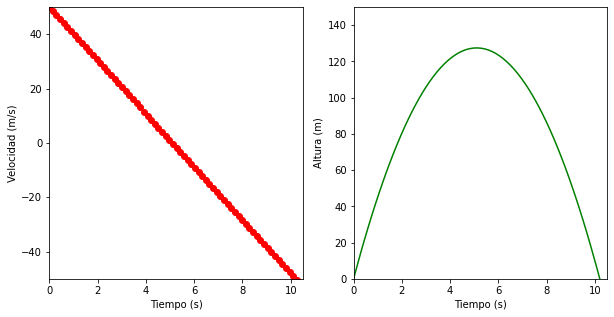

In [1]:
###########---------------------CASO IDEAl-----------------------#####################
import numpy as np
import matplotlib.pyplot as plt

#Tiempo 

t=np.linspace(0.0,30,200)



#Velocidad análitica

V0=50.0 #Velocidad inical m/s

def velo(V0_,t_):
	g=9.81 #Aceleración m/s² 
	v=V0-g*t
	return v

#Posición vertical 

Y0=0.0 #Altura inicial m 	
 	
def posi(Y0_,V0_,t_):
	g=9.81
	y=Y0+V0*t-0.5*g*t**2
	return y
 
Videal=velo(V0,t)
Yideal=posi(Y0,V0,t)

#Tiempo de vuelo ideal

for i in range(len(t)):
	g=9.81
	if Yideal[i]<=0 and i!=0:
		print("El tiempo de vuelo ideal es ",t[i])
		if t[i+1]>=((V0*2)/g):
			break


#Graficas 
fig = plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(t,Videal,'ro')
plt.xlim(0,10.5)
plt.ylim(-50,50)
plt.xlabel("Tiempo (s)")
plt.ylabel("Velocidad (m/s)")
plt.subplot(1,2,2)
plt.plot(t,Yideal, 'g')
plt.xlim(0,10.5)
plt.ylim(0,150)
plt.xlabel("Tiempo (s)")
plt.ylabel("Altura (m)")

El tiempo de vuelo con drag es  27.437185929648237


Text(0, 0.5, 'Altura (m)')

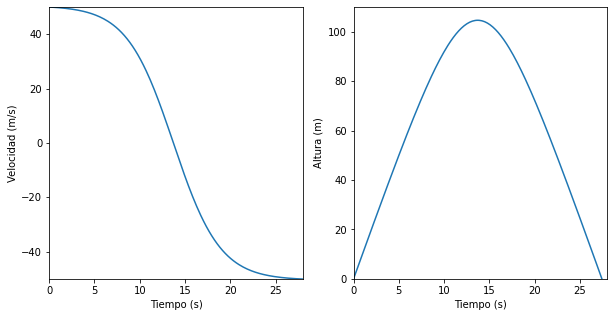

In [2]:
################################CASO REAL ###############

#Variables 
C_d=0.8 #Coeficiente de drag
R=0.05 #radio en m
A=np.pi*R**2
rho=1.225 #Densidad del aire kg/m³
m=1.0 #masa en kg
gamma=np.sqrt((C_d*rho*A)/(2*m))
g=9.81 

def vel(gamma_,V0_,t_):
	g=9.81 
	c1=np.sqrt(g)/gamma
	c2=gamma*np.sqrt(g)
	c3=(gamma*V0)/np.sqrt(g)
	if c3 > -1.0 and c3 < 1.0:
		v=c1*np.tanh(-c2*t+np.arctanh(c3))
	else:
		print("c3 debe estar entre -1 y 1")
	return v
	

def pos(gamma_,Y0_,V0_,t_):
	g=9.81
	c1=1/gamma**2
	c2=gamma*np.sqrt(g)
	c3=(gamma*V0)/np.sqrt(g)
	if c3 > -1.0 and c3 < 1.0:
		c4=np.arctanh(c3)
	else:
		print("c3 debe estar entre -1 y 1")
	y=Y0+c1*np.log(np.cosh(c4)/np.cosh(-c2*t+c4))
	return 2*y/g

	

V=vel(gamma,V0,t)
Y=pos(gamma,Y0,V0,t)

#Tiempo de vuelo real 
for i in range(len(t)):
	if Y[i]<=0 and i!=0:
		print("El tiempo de vuelo con drag es ",t[i])
		if t[i+1]>= t[i]:
			break


#Graficas 
fig = plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(t,V)
plt.xlim(0,28)
plt.ylim(-50,50)
plt.xlabel("Tiempo (s)")
plt.ylabel("Velocidad (m/s)")
plt.subplot(1,2,2)
plt.plot(t,Y)
plt.xlim(0,28)
plt.ylim(0,120)
plt.ylim(0,110)
plt.xlabel("Tiempo (s)")
plt.ylabel("Altura (m)")


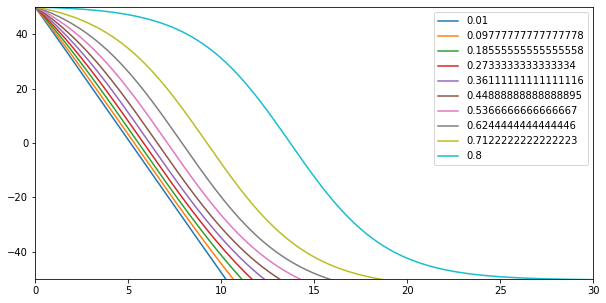

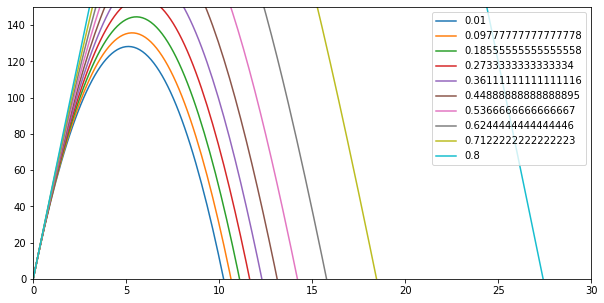

In [3]:
#################### Comportamiento de C respecto al tiempo de vuelo ####################################3

#c es numero entre 0 y 1

cd=np.linspace(0.01,0.8,10)

#print(cd)

#Calculo de constantes
Gama_cd=np.sqrt((cd*rho*A)/(2*m))
C1_cd=np.sqrt(g)/Gama_cd
C2_cd=Gama_cd*np.sqrt(g)
C3_cd=(Gama_cd*V0)/np.sqrt(g)
C4_cd=1/Gama_cd**2

#print(Gama_cd)
#print(C3_cd)

v_drag=np.zeros((len(t),len(cd)))
y_drag=np.zeros((len(t),len(cd)))

for i in range(len(t)):
	v_drag[i,:]=C1_cd[:]*np.tanh(-C2_cd[:]*t[i]+np.arctanh(C3_cd[:]))
	
#print(v_drag)


for i in range(len(t)):
	y_drag[i,:]=C4_cd[:]*np.log(np.cosh(np.arctanh(C3_cd[:]))/np.cosh(-C2_cd[:]*t[i]+np.arctanh(C3_cd[:])))/1


#print(y_drag)
	
	

#Graficas 
fig = plt.figure(figsize=(10,5))
for k in range(len(cd)):
	plt.plot(t,v_drag[:,k],label=cd[k])
plt.xlim(0,30)
plt.ylim(-50,50)
plt.legend()
fig = plt.figure(figsize=(10,5))
for k in range(len(cd)):
	plt.plot(t,y_drag[:,k],label=cd[k])
plt.xlim(0,30)
plt.ylim(0,150)
plt.legend()




Text(0.5, 0, 'Cd')

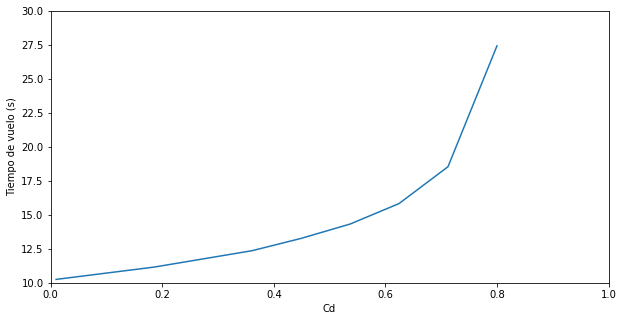

In [4]:
#tiempo de vuelo 
tv_cd=np.zeros(len(cd))
for k in range(len(tv_cd)):
    for i in range(len(t)):
        if y_drag[i,k]<=0 and i!=0:
            tv_cd[k]=t[i]
            if t[i+1]>= t[i]:
                break
            k+1

#print(tv_cd)

fig = plt.figure(figsize=(10,5))
plt.plot(cd,tv_cd)
plt.xlim(0,1)
plt.ylim(10,30)
plt.ylabel("Tiempo de vuelo (s)")
plt.xlabel("Cd")


In [5]:
#Observaciones

#Se muestra un incremento exponencial a medida que aumenta cd el tiempo diverge. 

# Numeros primos y fibonacci


In [6]:
import numpy as np
import matplotlib.pyplot as plt


################### parte A ##################3
#n1: numero de primos a calcular
def calcular_primos(n1):
    primos_calculados=0
    primos=[]
    actual=2
    while primos_calculados<n1:
        cont_divisores=0
        for i in range(1,actual):
            if(actual!=i and actual%i==0):
                cont_divisores+=1
        if(cont_divisores==1):
            primos.append(actual)
            primos_calculados+=1
        actual+=1
    return primos

print(calcular_primos(1000))

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997, 1009, 1013, 1019, 1021, 1031, 1033, 1039, 1049, 1051, 1061, 1063, 1069, 1087, 1091, 1093, 1097, 1103, 1109, 1117, 1123, 1129, 1151, 1153, 1163, 1171, 1181, 1187, 1193, 1201, 1213, 1217, 12

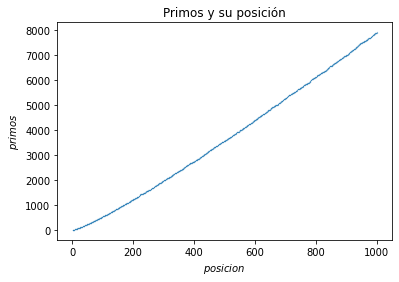

In [7]:
###################################Punto B

#n2: numero de primos a calcular
def plot_primos(n2):
    primos=calcular_primos(n2)
    posicion=[i for i in range(1,n2+1)]
    plt.plot(posicion,primos, 'o', markersize=0.2)
    plt.ylabel("$primos$")
    plt.xlabel("$posicion$")
    plt.title("Primos y su posición")
    plt.show()

plot_primos(1000)


#---------------------------------------------La regularidad es la correlación lineal

In [8]:
########################## punto C #################


#n: numero de sucesión a calcular
def sucesion_fibonacci(n):
    sucesion=0
    if(n==0):
        sucesion=0
    elif(n==1):
        sucesion=1
    else:
        sucesion=sucesion_fibonacci(n-1)+sucesion_fibonacci(n-2)
    return sucesion

#n3: numero de sucesiones a calcular
def calculo_fibonacci(n3):
    fibonacci=[]
    for i in range(n3):
        fibonacci.append(sucesion_fibonacci(i))
    return fibonacci
            
print(calculo_fibonacci(30))

#n_3: numero de la sucesion con la cual calcular el número aureo
def calculo_numero_aureo(n_3):
    numero_aureo=[]
    for i in range(1,n_3+1):
        numero_aureo.append(sucesion_fibonacci(i+1)/sucesion_fibonacci(i))
    return numero_aureo

print(calculo_numero_aureo(30))


#--------------------------------------Es el número divino, establecido por la naturaleza. 

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711, 28657, 46368, 75025, 121393, 196418, 317811, 514229]
[1.0, 2.0, 1.5, 1.6666666666666667, 1.6, 1.625, 1.6153846153846154, 1.619047619047619, 1.6176470588235294, 1.6181818181818182, 1.6179775280898876, 1.6180555555555556, 1.6180257510729614, 1.6180371352785146, 1.618032786885246, 1.618034447821682, 1.6180338134001253, 1.618034055727554, 1.6180339631667064, 1.6180339985218033, 1.618033985017358, 1.6180339901755971, 1.618033988205325, 1.618033988957902, 1.6180339886704431, 1.6180339887802426, 1.618033988738303, 1.6180339887543225, 1.6180339887482036, 1.6180339887505408]


In [12]:
########################## parte D ###################


#------------Error


#n4: numero de la sucesion con la cual calcular el número aureo
phi_real=(1+np.sqrt(5.))/2
def calculo_error(n4):
    error=[]
    for i in range(n4):
        phi_estimado=calculo_numero_aureo(n4)[i]
        epsilon=np.abs(phi_estimado-phi_real)/phi_real
        error.append(epsilon)
    return error

print(calculo_error(30))

[0.38196601125010515, 0.23606797749978967, 0.07294901687515776, 0.030056647916491423, 0.01114561800016822, 0.004305231718579094, 0.0016374027886314115, 0.0006264579760202099, 0.0002391358457583512, 9.136361346616536e-05, 3.48946069117676e-05, 1.3329018927062451e-05, 5.091164333229031e-06, 1.9446616335226094e-06, 7.427932029059675e-07, 2.8372196766005973e-07, 1.0837211752813756e-07, 4.139446987041184e-08, 1.581128000676001e-08, 6.039371522179324e-09, 2.306834697009074e-09, 8.811324316167856e-10, 3.3656273507239563e-10, 1.285554991381755e-10, 4.9103899573243705e-11, 1.8755925119329914e-11, 7.164150246971759e-12, 2.7363883904725003e-12, 1.045289386671466e-12, 3.9920530731617365e-13]


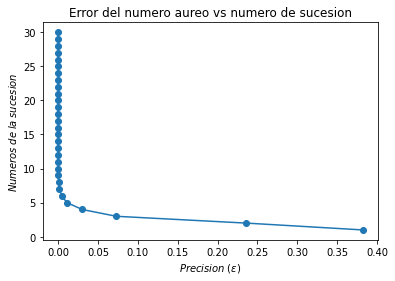

In [10]:
########################## parte E ###################

#-------------------------graficar el error

def plot_error(n5):
    errores=calculo_error(n5)
    nums_sucesion=[i for i in range(1,n5+1)]
    plt.plot(errores,nums_sucesion, 'o-')
    plt.xlabel("$Precision\;(\epsilon)$")
    plt.ylabel("$Numeros\;de\;la\;sucesion$")
    plt.title("Error del numero aureo vs numero de sucesion")
    plt.show()

plot_error(30)

# Fitting


# Punto A y B

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Text(0.5, 1.0, 'Original')

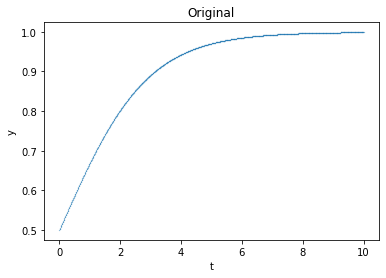

In [16]:
data=np.loadtxt("Hw_data.dat")
t=data[:,0]
y=data[:,1]

plt.plot(t,y, 'o', markersize=0.2)
plt.xlabel("t")
plt.ylabel("y")
plt.title("Original")

### Punto C 
<p> Ajuste para encontrar A y B </p>
$$ f(t)=\frac{A}{1+e^{-Bt}} $$

A=0.9999999401926466, B=0.7000007635889537


Text(0.5, 1.0, 'Fitted')

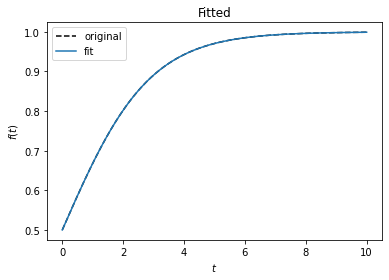

In [20]:
def function(t_,A_,B_):
    return (A_/(1+np.exp(-B_*t_)))

popt, pcov = curve_fit(function, t, y)

print("A={}, B={}".format(*popt))

f=function(t,*popt)

plt.plot(t,y,'--',c="k", label="original")
plt.xlabel("$t$", size=10)
plt.ylabel("$f(t)$")
plt.plot(t,f,label="fit")
plt.legend()
plt.title("Fitted")

# Newton-Raphson 


LAs raices son  [-1.8471270886958588, -2.2694940686074024e-06, 0.18046042583541735]


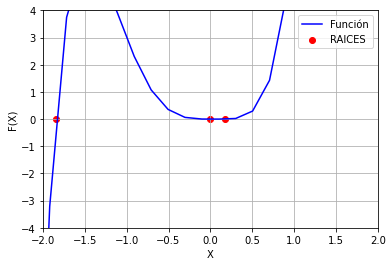

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# definir función

def FUNC(x):
	return 3*x**5+5*x**4-x**3
	
def DERIVATIVE(f,x,h):
	d=0.01
	if (h!=0):
		d=(f(x+h)-f(x-h))/(2*h)
	return d

def NR(f,df,xn,error,it,precision=0.0001,iterations=1000):
    h_ = 1.0e-4
    while error > precision and it < iterations:  
        try:   
            xn1 = xn - f(xn)/df(f,xn,h_) 
            error = np.abs((xn1-xn)/xn1)
            #print(xn1)
        except ZeroDivisionError:
            print("Hay division por cero")   
        xn = xn1
        it += 1
    return xn1

#Roots 

C=100 #numero de puntos
x=np.linspace(-10,10,C)

for i in x:
	roots=[NR(FUNC,DERIVATIVE,i,100,1),0]
	#print(roots, i )
	xnew=[NR(FUNC,DERIVATIVE,-2,100,1),NR(FUNC,DERIVATIVE,-0.5,100,1),NR(FUNC,DERIVATIVE,2,100,1)]
print("LAs raices son ",xnew)
y_ceros=np.zeros(len(xnew))


#Grafica 

plt.plot(x,FUNC(x),'b',label="Función")
plt.scatter(xnew,y_ceros,marker='o', color='red',label="RAICES")
plt.xlim(-2,2)
plt.ylim(-4,4)
plt.legend()
plt.xlabel("X")
plt.ylabel("F(X)")
plt.grid()
plt.savefig("Grafica_Newton_Raphson.png")

# Derivadas en c++ y graficar en Python

$$ f(x)=x-sin(x)$$


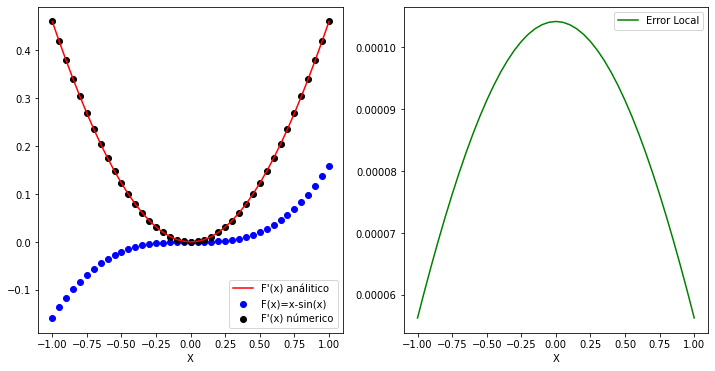

In [24]:
import numpy as np
import matplotlib.pyplot as plt

data=np.loadtxt('datosderivada.txt')

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(data[:,0],data[:,1],label="F(x)=x-sin(x)", color="blue")
plt.scatter(data[:,0],data[:,3],label="F'(x) númerico", color="black")
plt.plot(data[:,0],data[:,2],label="F'(x) análitico", color="red")
plt.xlabel("X")
plt.legend()
plt.subplot(1,2,2)
plt.plot(data[:,0],data[:,-1],label="Error Local", color="green")
plt.xlabel("X")
plt.legend()
plt.savefig("Grafica_derivada_errorlocal.png")
plt.show()

